# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [3]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths for dataset and split directories
dataset_root = '/content/drive/MyDrive/Capstone/PlantLeafDataset'
train_dir = '/content/sample_data/train'
val_dir = '/content/sample_data/val'
test_dir = '/content/sample_data/test'

# Split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Create directories for train, validation, and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def shuffle_split_data(source, train_dir, val_dir, test_dir, train_ratio, val_ratio):
    for class_dir in os.listdir(source):
        class_path = os.path.join(source, class_dir)
        if os.path.isdir(class_path):
            files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
            random.shuffle(files)

            train_files, test_files = train_test_split(files, test_size=test_ratio, random_state=42)
            remaining_val_ratio = val_ratio / (1 - test_ratio)
            train_files, val_files = train_test_split(train_files, test_size=remaining_val_ratio, random_state=42)

            for kind, images in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
                target_dir = os.path.join(globals()[f"{kind}_dir"], class_dir)
                os.makedirs(target_dir, exist_ok=True)
                for img in images:
                    shutil.copy(os.path.join(class_path, img), os.path.join(target_dir, img))

shuffle_split_data(dataset_root, train_dir, val_dir, test_dir, train_ratio, val_ratio)


# New Section

In [ ]:
diseases = os.listdir(train_dir)

In [ ]:
# printing the disease names
print(diseases)

['Corn_(maize)___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___healthy', 'Tomato___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Apple___Black_rot', 'Potato___Early_blight', 'Tomato___Late_blight', 'Cherry_(including_sour)___healthy', 'Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Soybean__healthy', 'Grape___healthy', 'Peach___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___Apple_scab', 'Tomato___Early_blight', 'Tomato___Target_Spot', 'Apple___Cedar_apple_rust', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Peach___Bacterial_spot', 'Grape___Black_rot', 'Apple___healthy', 'Soybean__caterpillar', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Corn_(maize)___Common_rust_', 'Pepper,_bell___healthy', 'Potato___Late_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_sp

In [ ]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 35


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('__')[0] not in plants:
        plants.append(plant.split('__')[0])
    if plant.split('_')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Corn_(maize)', 'Grape', 'Tomato', 'Pepper,_bell', 'Apple', 'Potato', 'Cherry_(including_sour)', 'Strawberry', 'Soybean', 'Peach']


In [ ]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 10


In [ ]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 35


In [ ]:
import pandas as pd

In [ ]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Corn_(maize)___healthy,1858
Grape___Esca_(Black_Measles),1919
Tomato___healthy,1925
Tomato___Bacterial_spot,1701
"Pepper,_bell___Bacterial_spot",1911
Apple___Black_rot,1986
Potato___Early_blight,1938
Tomato___Late_blight,1850
Cherry_(including_sour)___healthy,1824
Tomato___Septoria_leaf_spot,1743


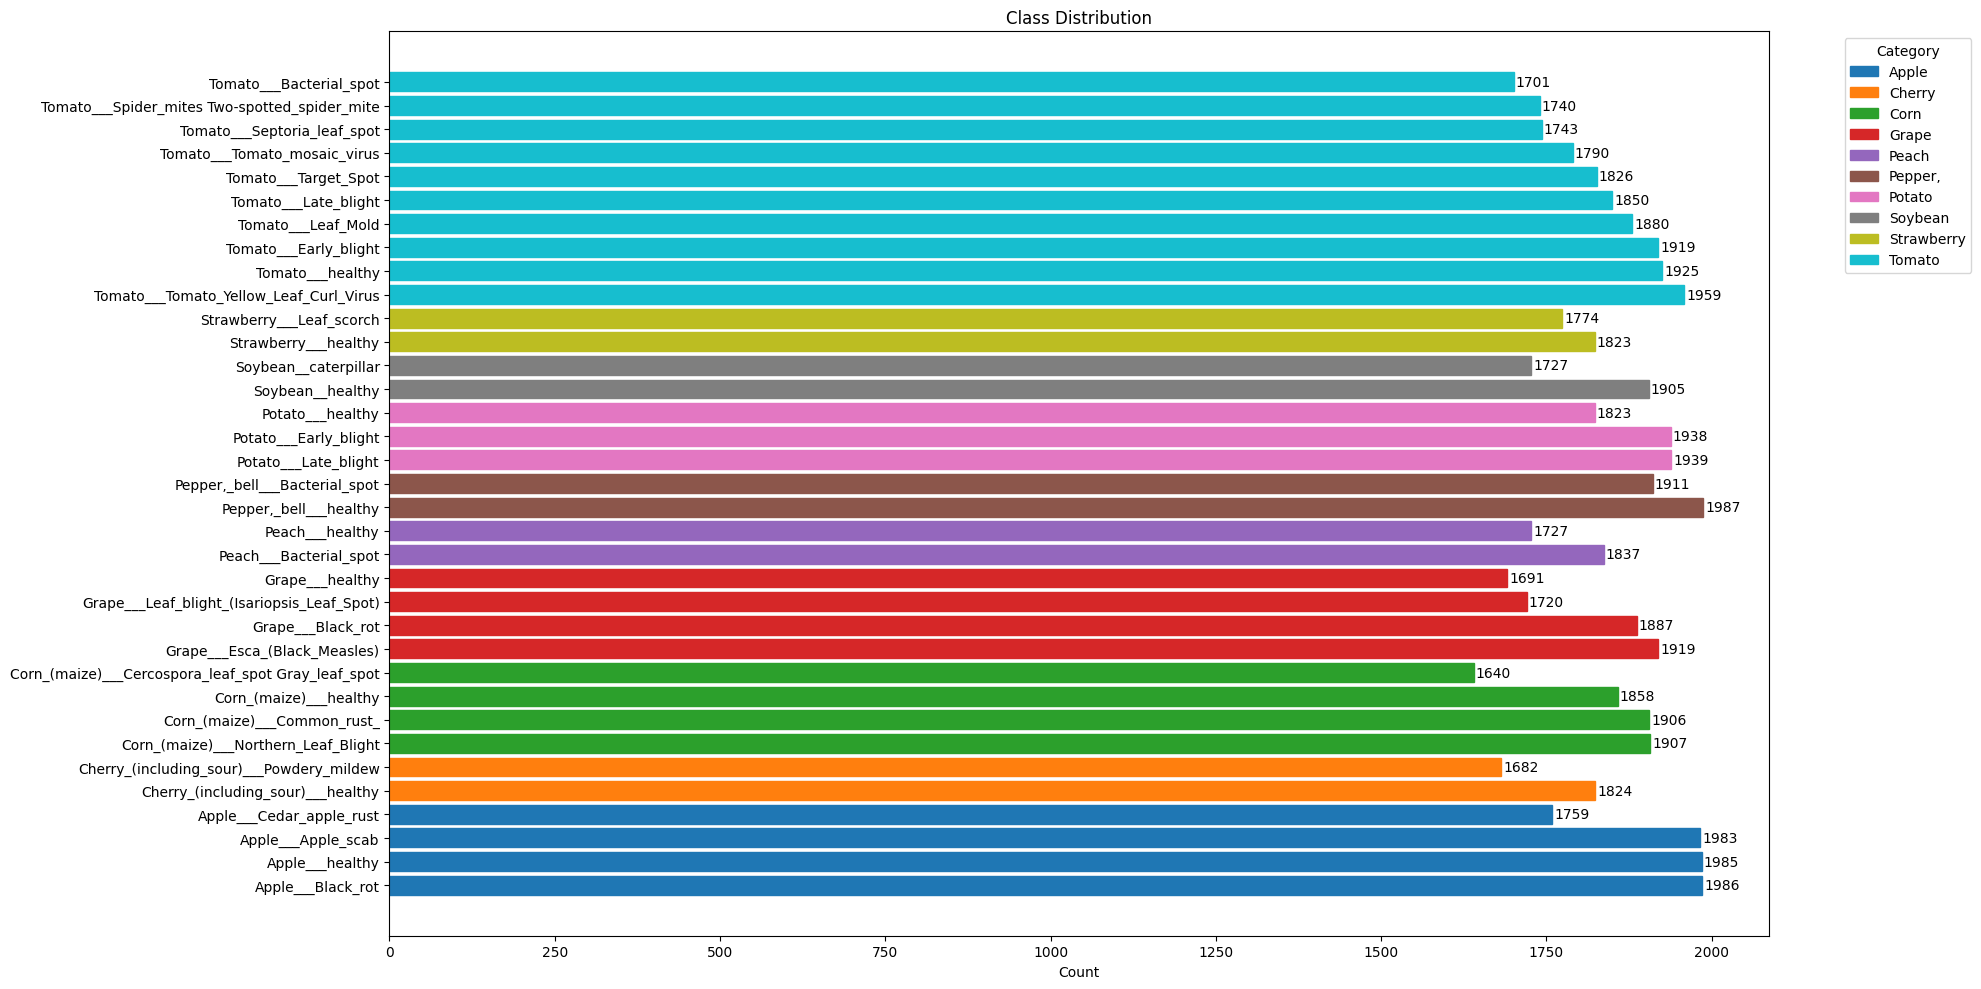

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Assuming 'diseases' is a list of disease names
# Assuming 'train_dir' is the directory where images are stored

# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(os.path.join(train_dir, disease)))

# Converting the nums dictionary to pandas dataframe with index as disease name and number of images as column
img_per_class = pd.DataFrame(list(nums.items()), columns=["disease", "count"])

# Extracting the plant name and condition from the disease names
img_per_class['plant'] = img_per_class['disease'].apply(lambda x: x.split('_')[0])
img_per_class['condition'] = img_per_class['disease'].apply(lambda x: '_'.join(x.split('_')[1:]))

# Sort the dataframe by count and then by plant name
img_per_class_sorted = img_per_class.sort_values(['plant', 'count'], ascending=[True, False])

# Assign a unique color to each plant
unique_plants = img_per_class_sorted['plant'].unique()
color_map = plt.get_cmap('tab20')  # Simpler colormap fetching

# Plotting the horizontal bar graph
plt.figure(figsize=(20, 10))
bars = plt.barh(img_per_class_sorted['disease'], img_per_class_sorted['count'])

# Apply color to each bar
for bar, plant in zip(bars, img_per_class_sorted['plant']):
    bar.set_color(color_map(unique_plants.tolist().index(plant) / len(unique_plants)))

# Adding the count labels on the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 3  # Adjusted to add the label outside of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')

# Create legend handles with the correct colors and labels
legend_handles = [plt.Rectangle((0,0),1,1, color=color_map(i / len(unique_plants))) for i in range(len(unique_plants))]

# Create a legend for the unique plants
plt.legend(handles=legend_handles, title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', labels=unique_plants.tolist())

plt.xlabel('Count')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Number of images for each disease
nums1 = {}
for disease in diseases:
    nums1[disease] = len(os.listdir(test_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums1.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Corn_(maize)___healthy,233
Grape___Esca_(Black_Measles),240
Tomato___healthy,241
Tomato___Bacterial_spot,213
"Pepper,_bell___Bacterial_spot",240
Apple___Black_rot,249
Potato___Early_blight,243
Tomato___Late_blight,232
Cherry_(including_sour)___healthy,229
Tomato___Septoria_leaf_spot,219


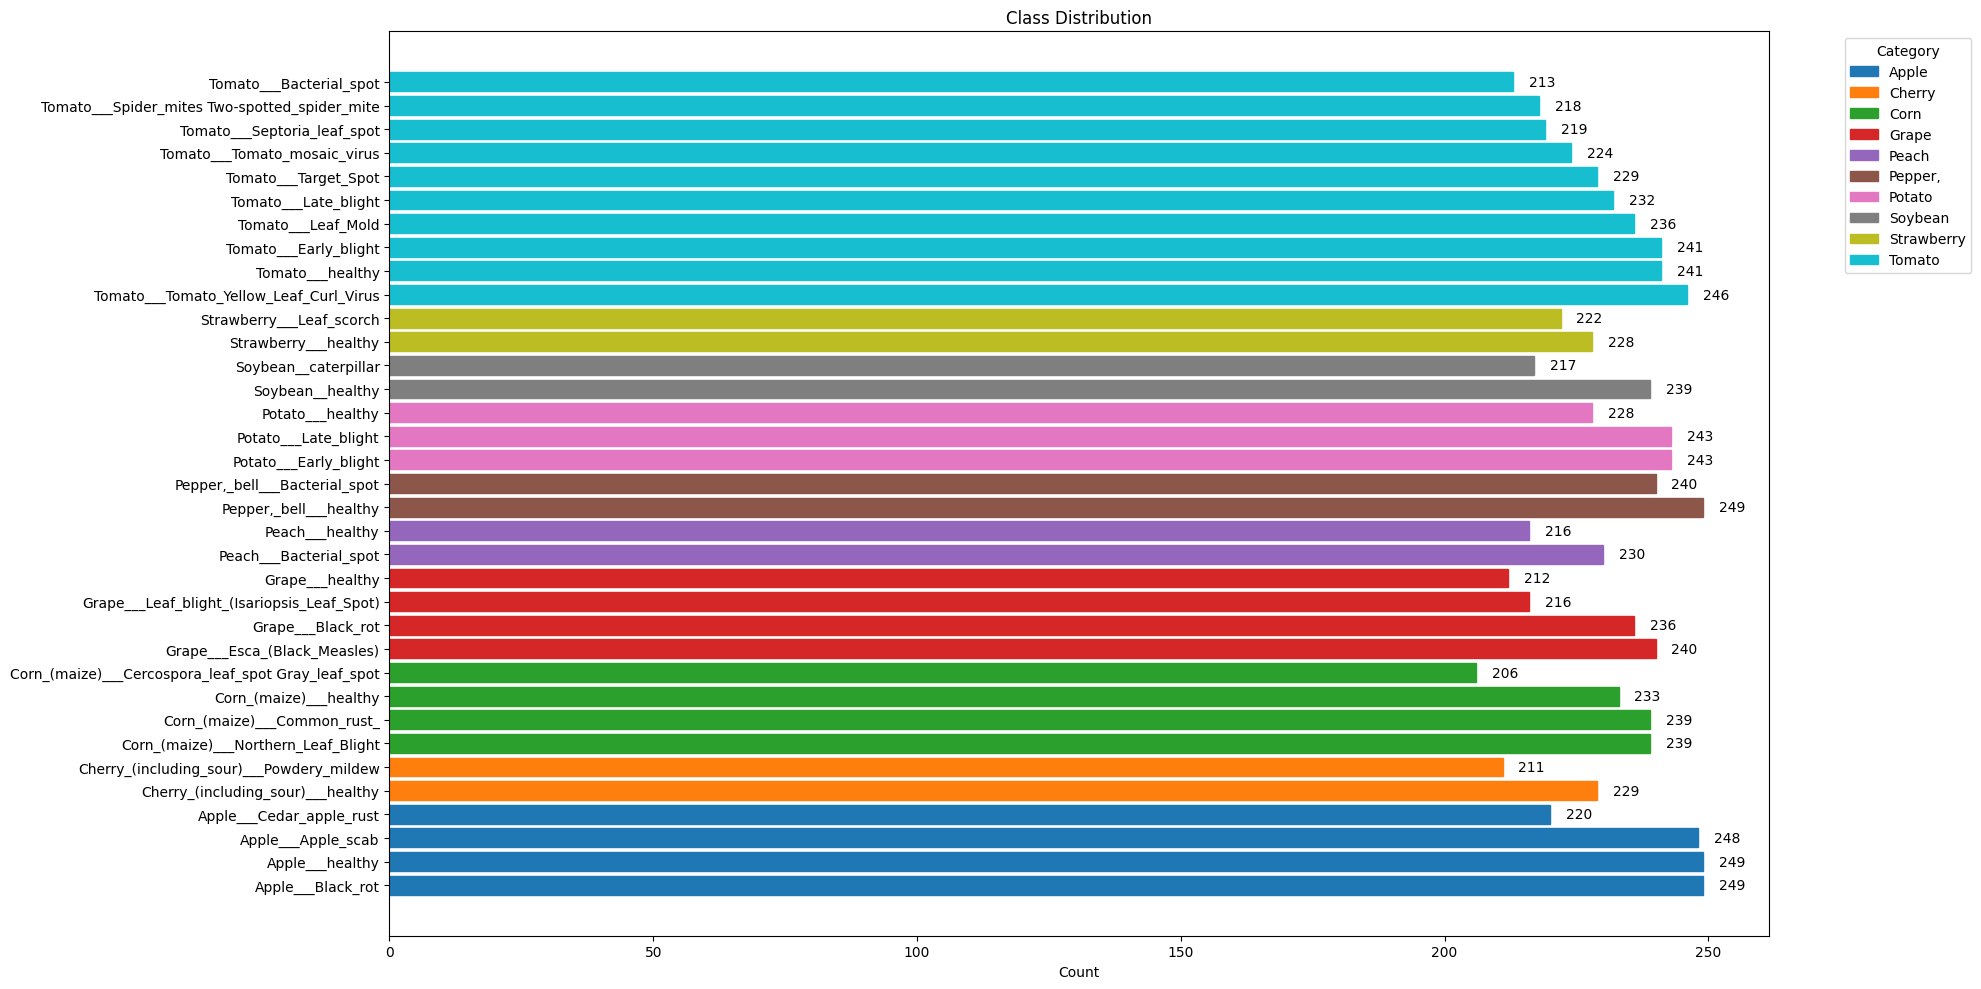

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Assuming 'diseases' is a list of disease names
# Assuming 'train_dir' is the directory where images are stored

# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(os.path.join(train_dir, disease)))

# Converting the nums dictionary to pandas dataframe with index as disease name and number of images as column
img_per_class = pd.DataFrame(list(nums1.items()), columns=["disease", "count"])

# Extracting the plant name and condition from the disease names
img_per_class['plant'] = img_per_class['disease'].apply(lambda x: x.split('_')[0])
img_per_class['condition'] = img_per_class['disease'].apply(lambda x: '_'.join(x.split('_')[1:]))

# Sort the dataframe by count and then by plant name
img_per_class_sorted = img_per_class.sort_values(['plant', 'count'], ascending=[True, False])

# Assign a unique color to each plant
unique_plants = img_per_class_sorted['plant'].unique()
color_map = plt.get_cmap('tab20')  # Simpler colormap fetching

# Plotting the horizontal bar graph
plt.figure(figsize=(20, 10))
bars = plt.barh(img_per_class_sorted['disease'], img_per_class_sorted['count'])

# Apply color to each bar
for bar, plant in zip(bars, img_per_class_sorted['plant']):
    bar.set_color(color_map(unique_plants.tolist().index(plant) / len(unique_plants)))

# Adding the count labels on the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 3  # Adjusted to add the label outside of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')

# Create legend handles with the correct colors and labels
legend_handles = [plt.Rectangle((0,0),1,1, color=color_map(i / len(unique_plants))) for i in range(len(unique_plants))]

# Create a legend for the unique plants
plt.legend(handles=legend_handles, title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', labels=unique_plants.tolist())

plt.xlabel('Count')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# Number of images for each disease
nums2 = {}
for disease in diseases:
    nums2[disease] = len(os.listdir(val_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums2.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Corn_(maize)___healthy,233
Grape___Esca_(Black_Measles),241
Tomato___healthy,241
Tomato___Bacterial_spot,213
"Pepper,_bell___Bacterial_spot",240
Apple___Black_rot,249
Potato___Early_blight,243
Tomato___Late_blight,232
Cherry_(including_sour)___healthy,229
Tomato___Septoria_leaf_spot,219


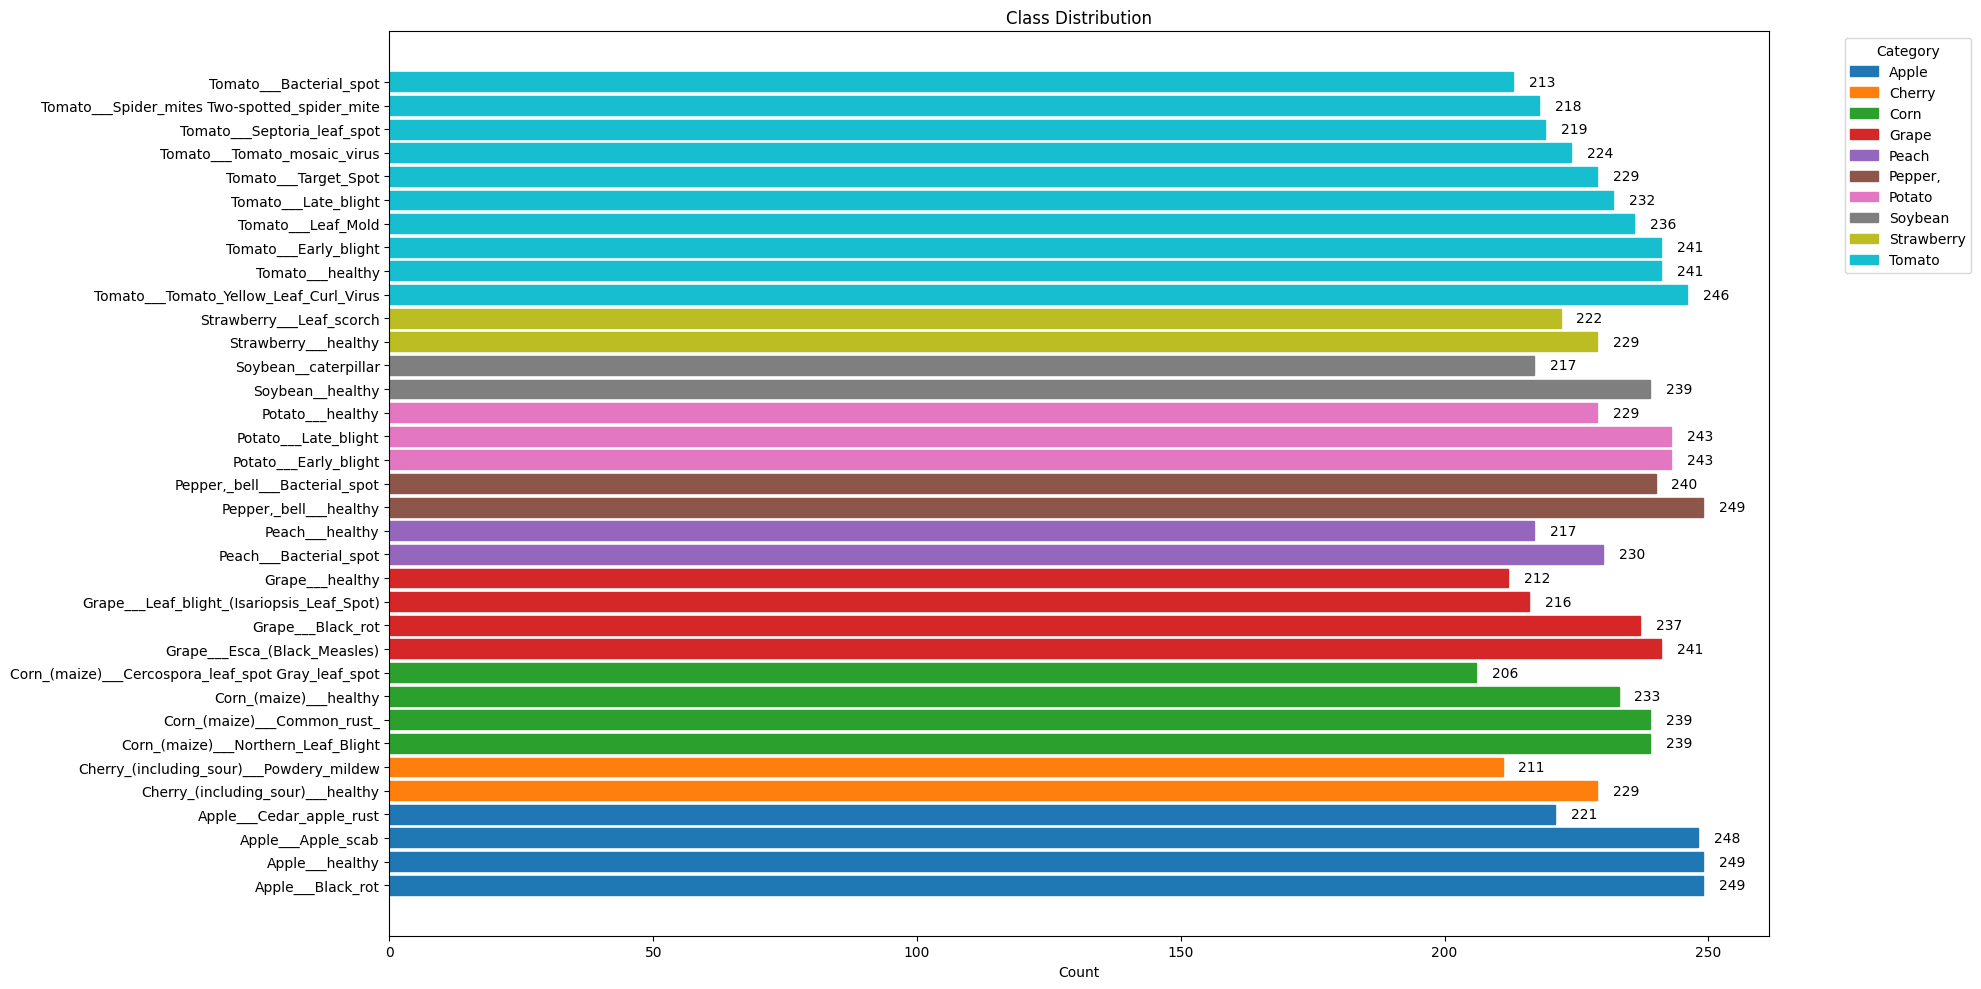

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Assuming 'diseases' is a list of disease names
# Assuming 'train_dir' is the directory where images are stored

# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(os.path.join(train_dir, disease)))

# Converting the nums dictionary to pandas dataframe with index as disease name and number of images as column
img_per_class = pd.DataFrame(list(nums2.items()), columns=["disease", "count"])

# Extracting the plant name and condition from the disease names
img_per_class['plant'] = img_per_class['disease'].apply(lambda x: x.split('_')[0])
img_per_class['condition'] = img_per_class['disease'].apply(lambda x: '_'.join(x.split('_')[1:]))

# Sort the dataframe by count and then by plant name
img_per_class_sorted = img_per_class.sort_values(['plant', 'count'], ascending=[True, False])

# Assign a unique color to each plant
unique_plants = img_per_class_sorted['plant'].unique()
color_map = plt.get_cmap('tab20')  # Simpler colormap fetching

# Plotting the horizontal bar graph
plt.figure(figsize=(20, 10))
bars = plt.barh(img_per_class_sorted['disease'], img_per_class_sorted['count'])

# Apply color to each bar
for bar, plant in zip(bars, img_per_class_sorted['plant']):
    bar.set_color(color_map(unique_plants.tolist().index(plant) / len(unique_plants)))

# Adding the count labels on the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 3  # Adjusted to add the label outside of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')

# Create legend handles with the correct colors and labels
legend_handles = [plt.Rectangle((0,0),1,1, color=color_map(i / len(unique_plants))) for i in range(len(unique_plants))]

# Create a legend for the unique plants
plt.legend(handles=legend_handles, title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', labels=unique_plants.tolist())

plt.xlabel('Count')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

In [ ]:
n_train = 0
for value in nums.values():
    n_train += value
n_test = 0
for value in nums1.values():
    n_test += value
n_valid = 0
for value in nums2.values():
    n_valid += value
print(f"There are {n_train} images for training")
print(f"There are {n_test} images for testing")
print(f"There are {n_valid} images for validation")

There are 64471 images for training
There are 8081 images for testing
There are 8087 images for validation


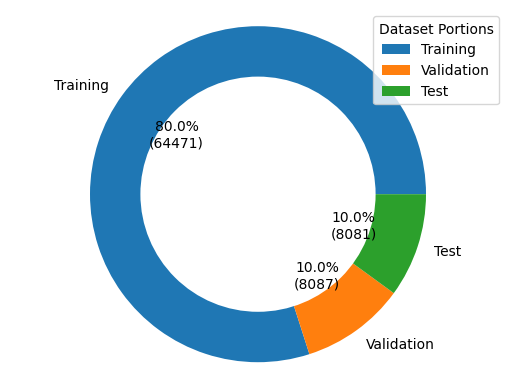

In [ ]:
# Labels for the sections of our pie chart
labels = 'Training', 'Validation', 'Test'

# The values for each section of the pie chart
sizes = [n_train, n_valid, n_test]

# The colors for each section of the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotting the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sizes) / 100), colors=colors)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

# Add a legend
plt.legend(labels, title="Dataset Portions", loc="best")

plt.show()


In [ ]:
#RESNET50

In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [5]:
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(256,256,3),classes=35)

94765736/94765736 [==============================] - 5s 0us/step


In [6]:
from tensorflow.keras.applications.resnet50 import preprocess_input
#Model building
base_model_tf.trainable=False

pt=Input(shape=(256,256,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dense(35,activation='softmax')(model_resnet)


model_main=Model(inputs=pt,outputs=model_resnet)
model_main.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 256, 256, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 256, 256, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0     

In [7]:
#Image augmentation
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

path_train=train_dir

path_valid=val_dir

train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(256,256),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(256,256),color_mode='rgb',class_mode='categorical')

Found 64466 images belonging to 35 classes.
Found 8087 images belonging to 35 classes.


In [8]:
#CallBacks
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [9]:
model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
#Training
history_resnet =model_main.fit(train,validation_data=valid,epochs=10,steps_per_epoch=200,verbose=1,callbacks=[mc,es,lr])

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: 1.2660 - accuracy: 0.6584
Epoch 1: val_accuracy improved from -inf to 0.87140, saving model to /content
200/200 [==============================] - 180s 853ms/step - loss: 1.2660 - accuracy: 0.6584 - val_loss: 0.4366 - val_accuracy: 0.8714 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 0.3952 - accuracy: 0.8773
Epoch 2: val_accuracy improved from 0.87140 to 0.90961, saving model to /content
200/200 [==============================] - 167s 838ms/step - loss: 0.3952 - accuracy: 0.8773 - val_loss: 0.2845 - val_accuracy: 0.9096 - lr: 0.0010
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 0.2808 - accuracy: 0.9117
Epoch 3: val_accuracy improved from 0.90961 to 0.91332, saving model to /content
200/200 [==============================] - 170s 851ms/step - loss: 0.2808 - accuracy: 0.9117 - val_loss: 0.2656 - val_accuracy: 0.9133 - lr: 0.0010
Epoch 4/10
200/200 [========

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming test_dir is your test directory
test_dir = '/content/sample_data/test'

# Test data generator
test_datagen = ImageDataGenerator()

# Loading test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for later comparison
)

# Evaluating the model on the test set
test_loss, test_accuracy = model_main.evaluate(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# If the test accuracy is not above 90%, consider further tuning your model.
if test_accuracy < 0.9:
    print("Consider further tuning your model or applying more advanced data augmentation to improve test accuracy.")


Found 8080 images belonging to 35 classes.
253/253 [==============================] - 34s 134ms/step - loss: 0.1301 - accuracy: 0.9562
Test Loss: 0.13005311787128448
Test Accuracy: 0.9561881422996521


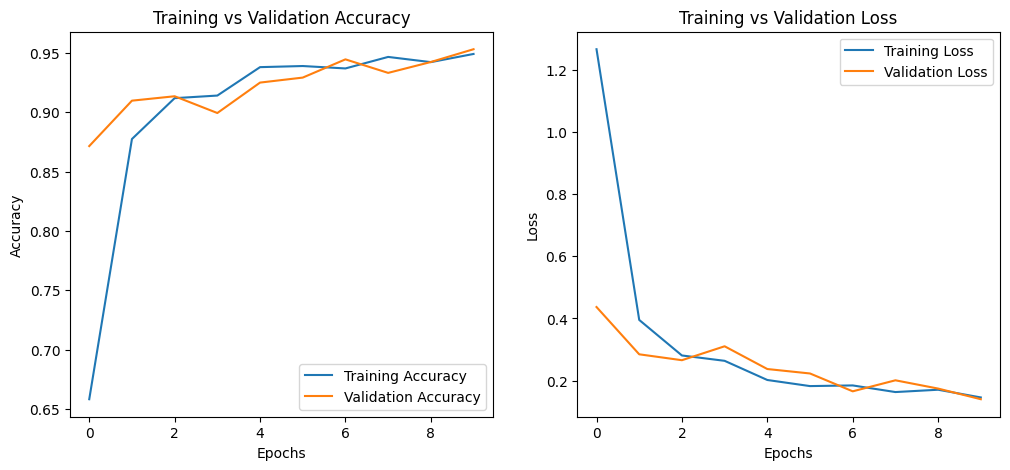

In [12]:
# Assuming 'history' is the output of the fit function from the actual training process,
# containing the training history including the recorded metrics at the end of each epoch.

# Plotting the graphs using the actual history object.
plt.figure(figsize=(12, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')  # 'accuracy' key might differ based on the actual history object
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')  # 'val_accuracy' key might differ based on the actual history object
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(history_resnet.history['loss'], label='Training Loss')  # 'loss' key might differ based on the actual history object
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')  # 'val_loss' key might differ based on the actual history object
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import classification_report

# Predicting on the entire test set
predictions = model_main.predict(test_data)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get true class indices
true_classes = test_data.classes

# Get class labels from the test data generator
class_labels = list(test_data.class_indices.keys())

# Generating the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)


253/253 [==============================] - 33s 125ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.99      0.97       248
                                 Apple___Black_rot       0.99      0.99      0.99       249
                          Apple___Cedar_apple_rust       0.99      0.96      0.98       220
                                   Apple___healthy       0.99      0.98      0.99       249
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       211
                 Cherry_(including_sour)___healthy       1.00      0.97      0.99       229
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.97      0.89       206
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       239
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.83      0.89       239
                     

253/253 [==============================] - 32s 127ms/step
[[246   1   0 ...   0   0   0]
 [  0 246   0 ...   0   0   0]
 [  7   0 212 ...   0   0   0]
 ...
 [  0   0   0 ... 235   0   0]
 [  0   0   0 ...   0 221   0]
 [  0   0   0 ...   0   1 234]]


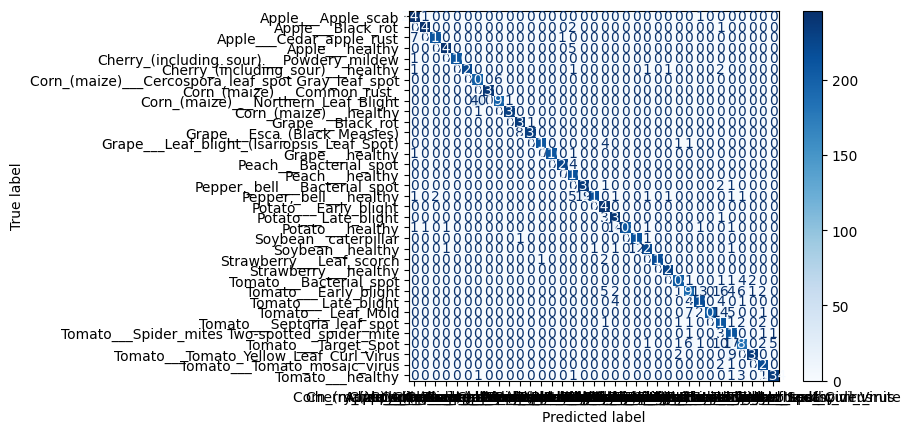

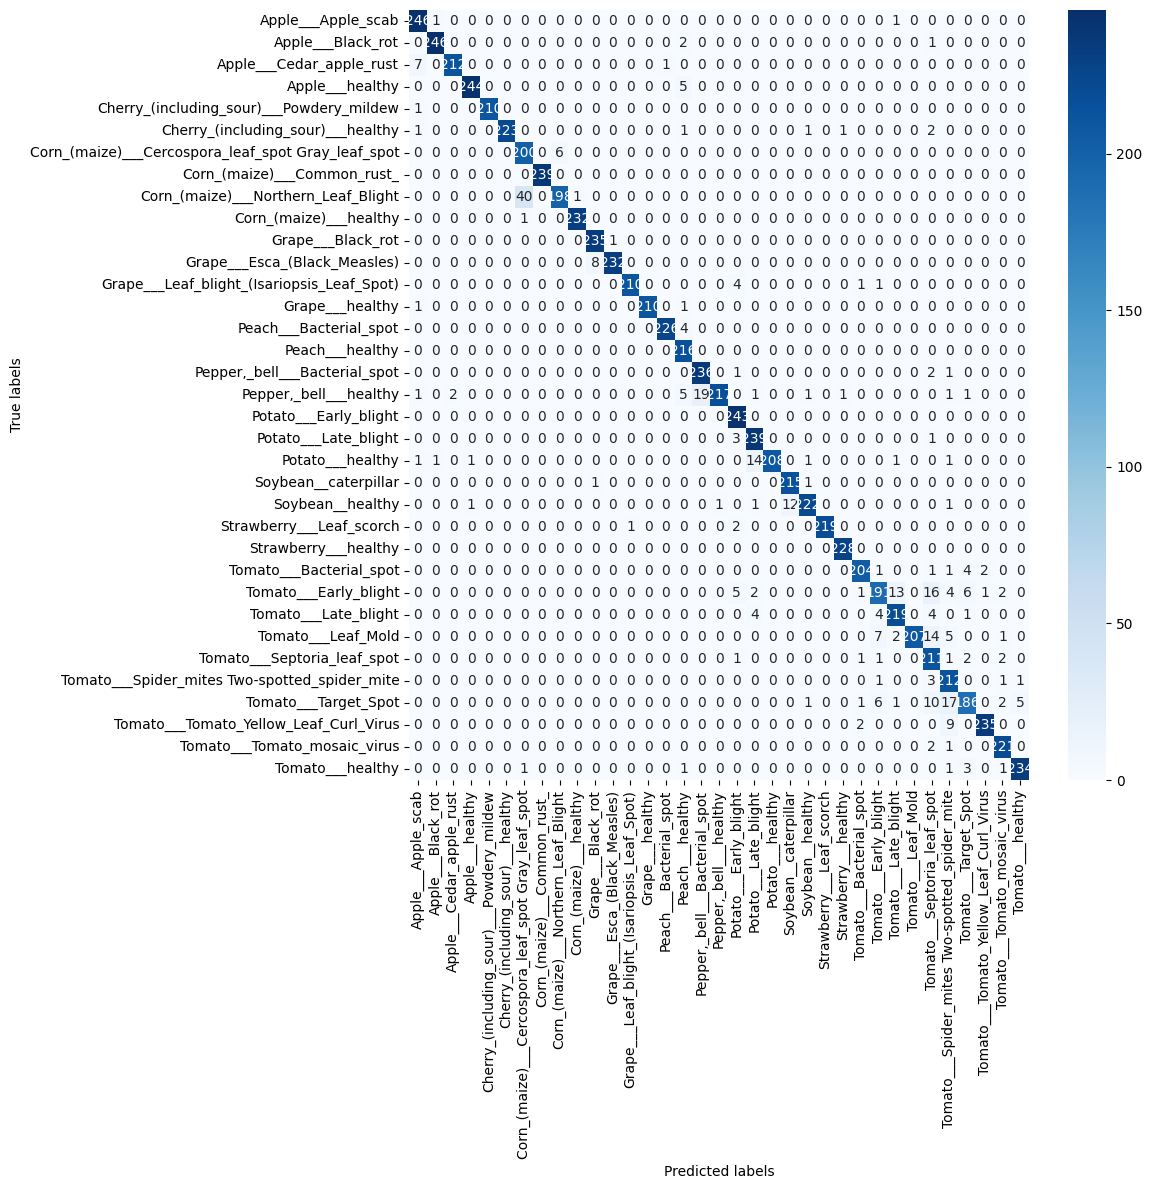

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generating predictions
predictions = model_main.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)  # Get the index of the max probability for each sample

# Retrieve the true class indices
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())  # Get the list of class labels

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print or plot the confusion matrix
print(cm)

# Optional: Plot using ConfusionMatrixDisplay from sklearn
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Or use seaborn (more aesthetic)
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
#EFFICIENTNET

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3

# Directories
train_dir = '/content/sample_data/train'
val_dir = '/content/sample_data/val'
test_dir = '/content/sample_data/test'

# Define ImageDataGenerator with advanced augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Define ImageDataGenerator for validation (no augmentation, just preprocessing)
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Setup Training Data Generator
train_images = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Setup Validation Data Generator
val_images = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)
# Load and configure the pretrained model for fine-tuning
pretrained_model = EfficientNetB3(include_top=False, input_shape=(256, 256, 3), weights="imagenet")
pretrained_model.trainable = True  # Fine-tune the whole model

# Freeze all layers except the last 20
for layer in pretrained_model.layers[:-20]:
    layer.trainable = False

# Model building
inputs = pretrained_model.input
x = pretrained_model(inputs, training=False)  # Ensure the base is run in inference mode
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Increase dropout rate for regularization
outputs = Dense(35, activation='softmax')(x)  # Assuming 35 classes

model = models.Model(inputs, outputs)

model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy')

# Training
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,  # Potentially increase epochs
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

Found 64466 images belonging to 35 classes.
Found 8087 images belonging to 35 classes.
43941136/43941136 [==============================] - 3s 0us/step
Epoch 1/10
2015/2015 [==============================] - ETA: 0s - loss: 0.4886 - accuracy: 0.8546

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2015/2015 [==============================] - 1292s 631ms/step - loss: 0.4886 - accuracy: 0.8546 - val_loss: 0.1647 - val_accuracy: 0.9442 - lr: 1.0000e-04
Epoch 2/10
2015/2015 [==============================] - 1226s 608ms/step - loss: 0.1398 - accuracy: 0.9538 - val_loss: 0.0905 - val_accuracy: 0.9693 - lr: 1.0000e-04
Epoch 3/10
2015/2015 [==============================] - 1238s 614ms/step - loss: 0.0925 - accuracy: 0.9699 - val_loss: 0.0918 - val_accuracy: 0.9683 - lr: 1.0000e-04
Epoch 4/10
2015/2015 [==============================] - 1241s 616ms/step - loss: 0.0730 - accuracy: 0.9760 - val_loss: 0.0634 - val_accuracy: 0.9782 - lr: 1.0000e-04
Epoch 5/10
2015/2015 [==============================] - 1251s 621ms/step - loss: 0.0585 - accuracy: 0.9810 - val_loss: 0.0680 - val_accuracy: 0.9761 - lr: 1.0000e-04
Epoch 6/10
2015/2015 [==============================] - 1260s 625ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0817 - val_accuracy: 0.9730 - lr: 1.0000e-04
Epoch 7/10
2015

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

# Assuming you have the test directory path and your model is named 'model'
test_dir = '/content/sample_data/test'

# Initialize the ImageDataGenerator for the test set (only preprocessing, no augmentation)
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Load test data
test_images = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Match with your model's expected input size
    batch_size=32,  # Can be adjusted based on your system's capabilities
    class_mode='categorical',  # Use 'binary' for binary classification
    shuffle=False  # Important for evaluating and matching predicted labels with true labels
)

# Predict on the test dataset
predictions = model.predict(test_images)

# Convert predictions to class indices (get the index of the max probability)
predicted_classes = np.argmax(predictions, axis=1)

# Get true class indices
true_classes = test_images.classes

# Calculate accuracy by comparing predicted and true labels
accuracy = np.mean(predicted_classes == true_classes)

print(f"Test Accuracy: {accuracy:.2f}")


Found 8080 images belonging to 35 classes.
253/253 [==============================] - 38s 142ms/step
Test Accuracy: 0.98


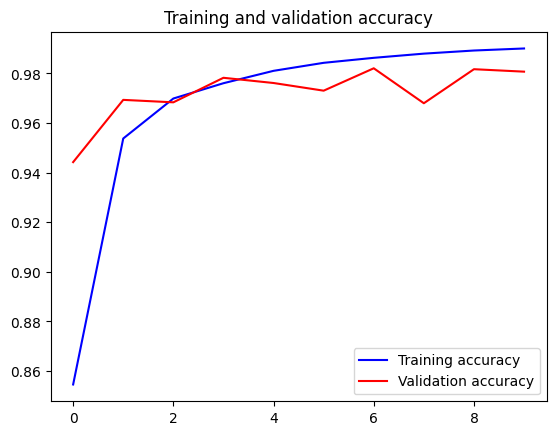

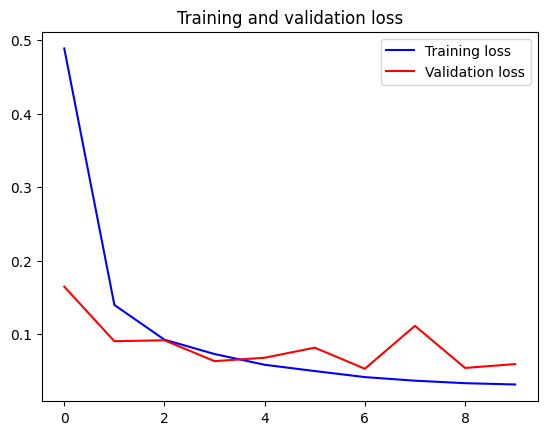

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import classification_report

# Path to your test dataset
test_dir = '/content/sample_data/test'

# Initialize the ImageDataGenerator for preprocessing
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),  # Adjust depending on your model input size
    batch_size=32,  # Adjust according to your needs
    class_mode='categorical',  # Use 'binary' for binary classification
    shuffle=False  # Important for maintaining order
)

# Make predictions on the test dataset
test_predictions = model.predict(test_generator)

# Convert predictions to class indices
predicted_classes = np.argmax(test_predictions, axis=1)

# Retrieve true class indices from the test data generator
true_classes = test_generator.classes

# Class labels (in the same order as class indices)
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

# Print the classification report
print(report)


Found 8080 images belonging to 35 classes.
253/253 [==============================] - 34s 135ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      1.00      1.00       248
                                 Apple___Black_rot       1.00      1.00      1.00       249
                          Apple___Cedar_apple_rust       1.00      0.99      1.00       220
                                   Apple___healthy       1.00      0.99      0.99       249
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       211
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       229
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.97      0.93       206
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       239
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.9

253/253 [==============================] - 34s 134ms/step


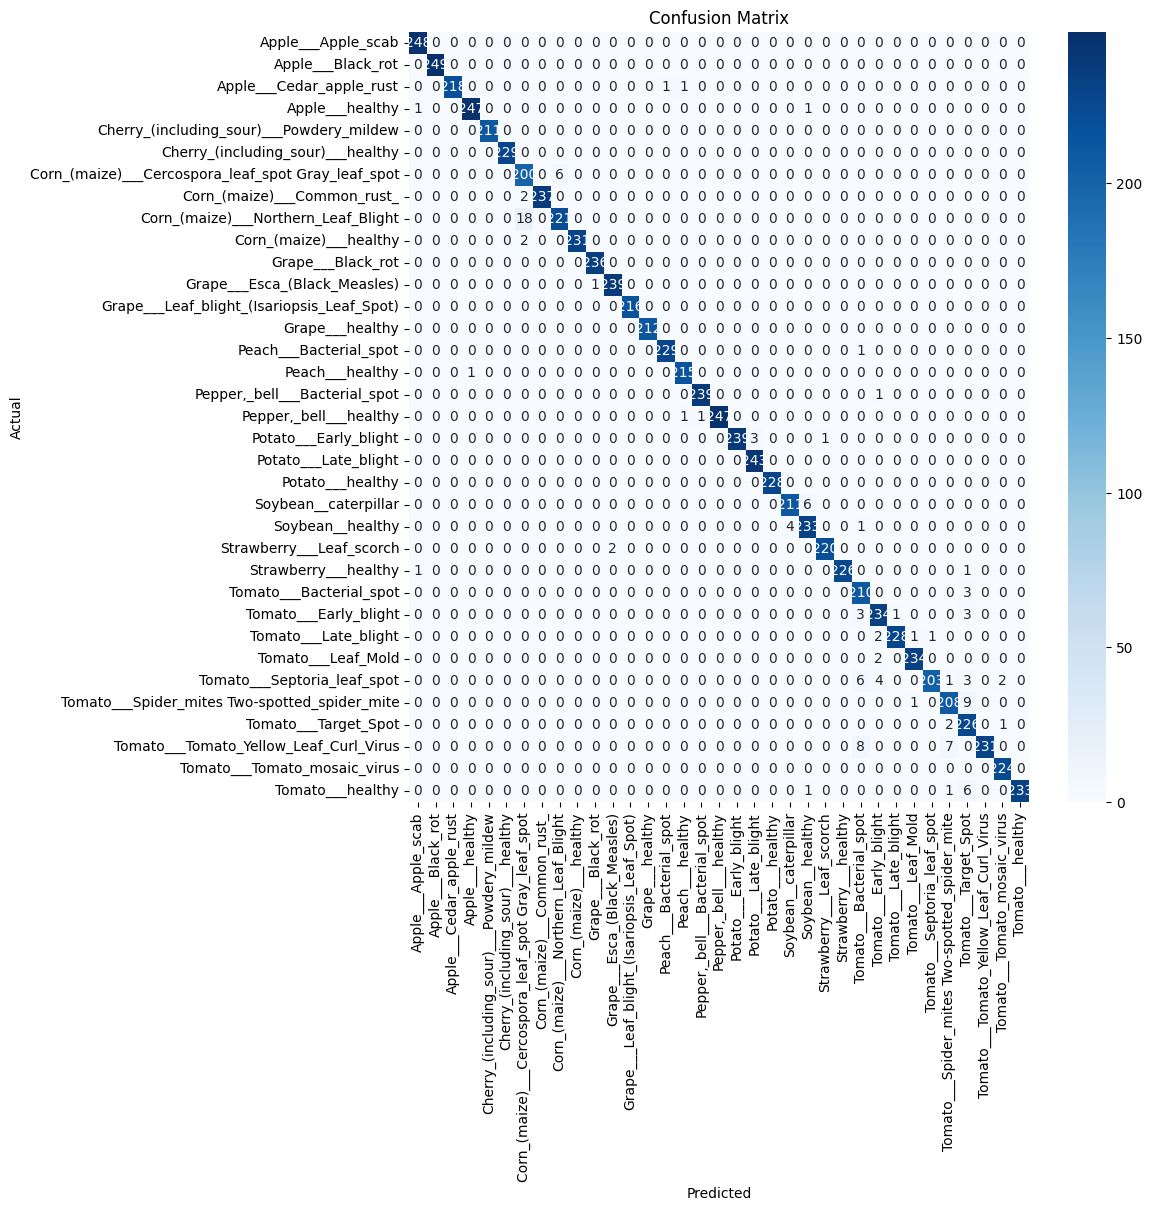

In [19]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test dataset
test_predictions = model.predict(test_generator)

# Convert predictions to class indices
predicted_classes = np.argmax(test_predictions, axis=1)

# Retrieve true class indices from the test data generator
true_classes = test_generator.classes

# Class labels (in the same order as class indices)
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Densenet169

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory(train_dir, label_mode="categorical", image_size=(256, 256),
                                          batch_size=32, seed=42, shuffle=True)

val_data = image_dataset_from_directory(val_dir, label_mode="categorical", image_size=(256, 256),
                                        batch_size=32, seed=42, shuffle=False)

test_data = image_dataset_from_directory(test_dir, label_mode="categorical", image_size=(256, 256),
                                         batch_size=32, seed=42, shuffle=False)


Found 64467 files belonging to 35 classes.
Found 8086 files belonging to 35 classes.
Found 8080 files belonging to 35 classes.


In [ ]:
print(train_data)
print(test_data)
print(val_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 35), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 35), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 35), dtype=tf.float32, name=None))>


In [ ]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)
val_data = val_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 5,min_delta = 0.0001,restore_best_weights = True,verbose = 1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",paitence = 4,factor = 0.5,patience = 4,min_lr = 1e-7,verbose = 1)

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
base_model = tf.keras.applications.DenseNet169(include_top = False)
base_model.trainable = False

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
for layer_num,layer in enumerate(base_model.layers):
  print(layer_num,layer.name,layer.trainable)

0 input_7 False
1 zero_padding2d False
2 conv1/conv False
3 conv1/bn False
4 conv1/relu False
5 zero_padding2d_1 False
6 pool1 False
7 conv2_block1_0_bn False
8 conv2_block1_0_relu False
9 conv2_block1_1_conv False
10 conv2_block1_1_bn False
11 conv2_block1_1_relu False
12 conv2_block1_2_conv False
13 conv2_block1_concat False
14 conv2_block2_0_bn False
15 conv2_block2_0_relu False
16 conv2_block2_1_conv False
17 conv2_block2_1_bn False
18 conv2_block2_1_relu False
19 conv2_block2_2_conv False
20 conv2_block2_concat False
21 conv2_block3_0_bn False
22 conv2_block3_0_relu False
23 conv2_block3_1_conv False
24 conv2_block3_1_bn False
25 conv2_block3_1_relu False
26 conv2_block3_2_conv False
27 conv2_block3_concat False
28 conv2_block4_0_bn False
29 conv2_block4_0_relu False
30 conv2_block4_1_conv False
31 conv2_block4_1_bn False
32 conv2_block4_1_relu False
33 conv2_block4_2_conv False
34 conv2_block4_concat False
35 conv2_block5_0_bn False
36 conv2_block5_0_relu False
37 conv2_block5_1_

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
data_aug = tf.keras.Sequential([
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip("horizontal"),
    preprocessing.Rescaling(1/255.)
],name = "data_augmentation_layer")

In [ ]:
inputs = layers.Input(shape = (256,256,3),name = "Input_layer")
x = data_aug(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D(name = "Global_average_pooling_layer")(x)
x = layers.Dense(32,activation = "relu",kernel_initializer = tf.keras.initializers.HeNormal(),name = "Dense_layer_1")(x)
x = layers.Dense(35,name = "Dense_layer_2")(x)
outputs = layers.Activation("softmax",dtype = tf.float32)(x)
model_1 = tf.keras.Model(inputs,outputs)

In [ ]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 data_augmentation_layer (S  (None, None, None, 3)     0         
 equential)                                                      
                                                                 
 densenet169 (Functional)    (None, None, None, 1664   12642880  
                             )                                   
                                                                 
 Global_average_pooling_lay  (None, 1664)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 Dense_layer_1 (Dense)       (None, 32)                5328

In [ ]:
for layer_num,layer in enumerate(model_1.layers):
  print(layer_num,layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

0 Input_layer True float32 <Policy "float32">
1 data_augmentation_layer True float32 <Policy "mixed_float16">
2 densenet169 False float32 <Policy "mixed_float16">
3 Global_average_pooling_layer True float32 <Policy "mixed_float16">
4 Dense_layer_1 True float32 <Policy "mixed_float16">
5 Dense_layer_2 True float32 <Policy "mixed_float16">
6 activation True float32 <Policy "float32">


In [ ]:
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data,epochs = 10,steps_per_epoch=len(train_data),
                        validation_data = val_data,validation_steps = int(0.25*len(val_data)),
                        callbacks = [early_stop,reduce_lr])

Epoch 1/10
2015/2015 [==============================] - 713s 346ms/step - loss: 0.6925 - accuracy: 0.8106 - val_loss: 0.2778 - val_accuracy: 0.9142 - lr: 0.0010
Epoch 2/10
2015/2015 [==============================] - 496s 246ms/step - loss: 0.2471 - accuracy: 0.9218 - val_loss: 0.1777 - val_accuracy: 0.9415 - lr: 0.0010
Epoch 3/10
2015/2015 [==============================] - 438s 217ms/step - loss: 0.1937 - accuracy: 0.9375 - val_loss: 0.1419 - val_accuracy: 0.9568 - lr: 0.0010
Epoch 4/10
2015/2015 [==============================] - 401s 199ms/step - loss: 0.1721 - accuracy: 0.9425 - val_loss: 0.1241 - val_accuracy: 0.9588 - lr: 0.0010
Epoch 5/10
2015/2015 [==============================] - 348s 172ms/step - loss: 0.1556 - accuracy: 0.9478 - val_loss: 0.1051 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 6/10
2015/2015 [==============================] - 325s 161ms/step - loss: 0.1467 - accuracy: 0.9495 - val_loss: 0.1243 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 7/10
2015/2015 [============

In [ ]:
print("Testing Accuracy is = ",model_1.evaluate(test_data))

253/253 [==============================] - 23s 90ms/step - loss: 0.1956 - accuracy: 0.9349
Testing Accuracy is =  [0.19560188055038452, 0.9349009990692139]


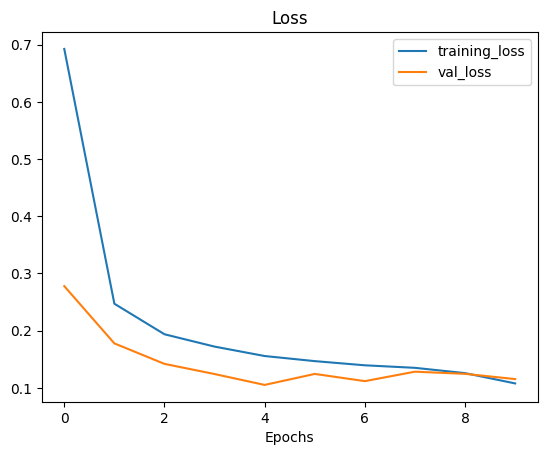

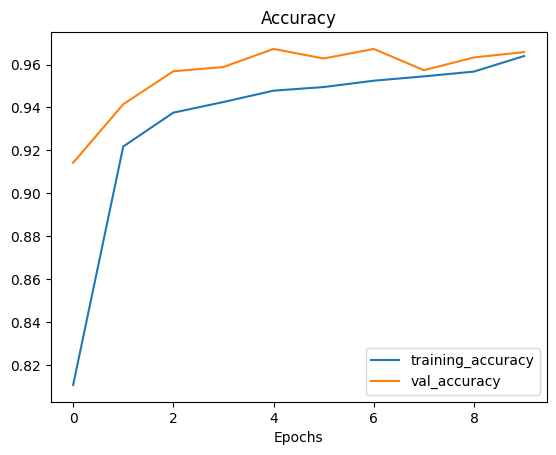

In [ ]:
plot_loss_curves(history_1)

In [ ]:
from sklearn.metrics import classification_report

# Assuming 'test_images' is your test data generator
predictions = model_1.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_images.classes

# Getting class labels from the generator
class_labels = list(test_images.class_indices.keys())  # This gets the class labels

# Ensure the class labels are in the same order as the indices
class_labels = [class_labels[idx] for idx in sorted(test_images.class_indices.values())]

# Generate and print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


253/253 [==============================] - 23s 91ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       248
                                 Apple___Black_rot       0.99      0.98      0.99       249
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       220
                                   Apple___healthy       0.96      0.99      0.98       249
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.99       211
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       229
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.96      0.91       206
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       239
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.88      0.92       239
                      

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'test_data' is your test data generator and 'model_1' is your trained model
predictions = model_1.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

# Getting class labels from the generator in the correct order
class_labels = list(test_data.class_indices.keys())
class_labels = [class_labels[idx] for idx in sorted(test_data.class_indices.values())]

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


In [ ]:
#VISION TRANSSFORMERS

In [ ]:
pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-addons


In [ ]:
import tensorflow_addons as tfa



/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
!pip install vit-keras


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from vit_keras import vit

# Setting up ImageDataGenerator for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Function to create a Vision Transformer model
def create_vit_classifier(num_classes):
    vit_model = vit.vit_b16(
        image_size=224,
        activation='softmax',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=num_classes)

    model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(num_classes, 'softmax')
    ])

    return model

# Determine the number of classes from the training data generator
num_classes = len(train_generator.class_indices)

# Create and compile the ViT model
model = create_vit_classifier(num_classes)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=9)  # You might need to adjust the number of epochs based on your specific needs

# After training, evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy vs epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

# Plot loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf

# Assuming model_1 is your trained model
# If the model is not in memory, you can load it using: model_1 = load_model('path_to_your_model')

# Function to get the labels from a dataset
def get_true_labels(dataset):
    num_batches = tf.data.experimental.cardinality(dataset).numpy()
    true_labels = []
    for images, labels in dataset.take(num_batches):
        true_labels.append(labels.numpy())
    return np.concatenate(true_labels, axis=0)

# Function to get the predictions from a model
def get_predictions(model, dataset):
    predictions = model.predict(dataset)
    return np.argmax(predictions, axis=1)

# Get the true labels (one hot encoded) from the test dataset
true_labels = get_true_labels(test_data)
# Since the labels are one-hot encoded, get the class indices
true_labels = np.argmax(true_labels, axis=1)

# Get the predicted class indices
predicted_classes = get_predictions(model, test_data)

# Generate the classification report
class_labels = list(train_data.class_names)  # Assuming class names are the same across train, val, and test
report = classification_report(true_labels, predicted_classes, target_names=class_labels)
print(report)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get the true labels (one hot encoded) from the test dataset
true_labels = get_true_labels(test_data)
# Since the labels are one-hot encoded, get the class indices
true_labels = np.argmax(true_labels, axis=1)

# Get the predicted class indices
predicted_classes = get_predictions(model_1, test_data)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


In [ ]:
# ENSEMBLE METHODS WITH 2 MODELS

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3
from vit_keras import vit
from sklearn.metrics import accuracy_score, classification_report

# Directories
train_dir = '/content/sample_data/train'
val_dir = '/content/sample_data/val'
test_dir = '/content/sample_data/test'

# Setting up ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# ImageDataGenerator for validation and test (no augmentation, just preprocessing)
val_test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


# Build EfficientNetB3 model
def build_efficientnet(num_classes):
    base_model = EfficientNetB3(include_top=False, input_shape=(256, 256, 3), weights="imagenet")
    base_model.trainable = True  # Fine-tune the whole model

    # Freeze all layers except the last 20
    for layer in base_model.layers[:-20]:
        layer.trainable = False

    inputs = base_model.input
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build Vision Transformer model
def build_vit(num_classes):
    vit_model = vit.vit_b16(
        image_size=256,
        activation='softmax',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=num_classes)

    model = tf.keras.Sequential([
        vit_model,
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Determine the number of classes from the training data generator
num_classes = len(train_generator.class_indices)

# Create and compile both models
model_efficientnet = build_efficientnet(num_classes)
model_vit = build_vit(num_classes)

# Train both models (here you might use previously defined or new fitting callbacks)
history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001),
        ModelCheckpoint('efficientnet_best_model.h5', save_best_only=True, monitor='val_accuracy')
    ]
)

history_vit = model_vit.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001),
        ModelCheckpoint('vit_best_model.h5', save_best_only=True, monitor='val_accuracy')
    ]
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming test_dir is your test directory
test_dir = '/content/sample_data/test'

# Test data generator
test_datagen = ImageDataGenerator()

# Loading test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for later comparison
)


Found 8080 images belonging to 35 classes.


In [ ]:
# Ensemble and Evaluation Functions
def ensemble_predictions(model1, model2, generator):
    pred1 = model1.predict(generator, steps=generator.samples // generator.batch_size)
    pred2 = model2.predict(generator, steps=generator.samples // generator.batch_size)
    predictions = (pred1 + pred2) / 2
    return predictions

def evaluate_ensemble(predictions, generator):
    pred_labels = np.argmax(predictions, axis=1)
    true_labels = generator.classes[:len(pred_labels)]
    accuracy = accuracy_score(true_labels, pred_labels)
    cls_report = classification_report(true_labels, pred_labels, target_names=generator.class_indices.keys())
    return accuracy, cls_report

# Ensemble predictions and evaluation
ensemble_preds = ensemble_predictions(model_efficientnet, model_vit, test_data)
accuracy, cls_report = evaluate_ensemble(ensemble_preds, test_data)
print(f'Ensemble Test Accuracy: {accuracy}')
print('Classification Report:\n', cls_report)

252/252 [==============================] - 143s 566ms/step
Ensemble Test Accuracy: 0.9854910714285714
Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.99      0.99       247
                                 Apple___Black_rot       0.99      1.00      0.99       249
                          Apple___Cedar_apple_rust       0.99      1.00      1.00       220
                                   Apple___healthy       0.99      1.00      1.00       249
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       211
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       229
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.98      0.98       206
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       239
               Corn_(maize)___Northern_Leaf_B

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

# Function to perform hard voting ensemble
def hard_voting_predictions(model1, model2, generator):
    # Predict class indices
    pred1 = np.argmax(model1.predict(generator, steps=generator.samples // generator.batch_size), axis=1)
    pred2 = np.argmax(model2.predict(generator, steps=generator.samples // generator.batch_size), axis=1)

    # Transpose and perform voting
    final_predictions = np.array([pred1, pred2])
    final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=final_predictions)

    return final_predictions

# Function to perform soft voting ensemble
def soft_voting_predictions(model1, model2, generator):
    # Predict probabilities
    pred1 = model1.predict(generator, steps=generator.samples // generator.batch_size)
    pred2 = model2.predict(generator, steps=generator.samples // generator.batch_size)

    # Average the probabilities
    averaged_predictions = (pred1 + pred2) / 2
    final_predictions = np.argmax(averaged_predictions, axis=1)

    return final_predictions

# Function to evaluate predictions
def evaluate_predictions(predictions, generator):
    true_labels = generator.classes[:len(predictions)]  # Adjust the length of classes to match predictions
    accuracy = accuracy_score(true_labels, predictions)
    cls_report = classification_report(true_labels, predictions, target_names=generator.class_indices.keys())
    return accuracy, cls_report

# Generate predictions using hard and soft voting
hard_predictions = hard_voting_predictions(model_efficientnet, model_vit, test_data)
soft_predictions = soft_voting_predictions(model_efficientnet, model_vit, test_data)

# Evaluate both voting methods
hard_accuracy, hard_cls_report = evaluate_predictions(hard_predictions, test_data)
soft_accuracy, soft_cls_report = evaluate_predictions(soft_predictions, test_data)

# Print results
print(f'Hard Voting Ensemble Test Accuracy: {hard_accuracy}')
print('Hard Voting Classification Report:\n', hard_cls_report)
print(f'Soft Voting Ensemble Test Accuracy: {soft_accuracy}')
print('Soft Voting Classification Report:\n', soft_cls_report)


252/252 [==============================] - 143s 567ms/step
Hard Voting Ensemble Test Accuracy: 0.9294394841269841
Hard Voting Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.99      0.99       247
                                 Apple___Black_rot       0.98      1.00      0.99       249
                          Apple___Cedar_apple_rust       0.84      1.00      0.91       220
                                   Apple___healthy       0.94      1.00      0.97       249
          Cherry_(including_sour)___Powdery_mildew       0.91      1.00      0.95       211
                 Cherry_(including_sour)___healthy       0.85      1.00      0.92       229
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      1.00      0.91       206
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       239
               Corn_(

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions using hard and soft voting
hard_predictions = hard_voting_predictions(model_efficientnet, model_vit, test_data)
soft_predictions = soft_voting_predictions(model_efficientnet, model_vit, test_data)

# Evaluate both voting methods and print the accuracy and classification reports
hard_accuracy, hard_cls_report = evaluate_predictions(hard_predictions, test_data)
soft_accuracy, soft_cls_report = evaluate_predictions(soft_predictions, test_data)

# Print results for hard voting
print(f'Hard Voting Ensemble Test Accuracy: {hard_accuracy}')
print('Hard Voting Classification Report:\n', hard_cls_report)

# Generate and print the hard voting confusion matrix
hard_cm = confusion_matrix(test_data.classes[:len(hard_predictions)], hard_predictions)
print("Hard Voting Confusion Matrix:")
print(hard_cm)

# Visualize the hard voting confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(hard_cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Hard Voting Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Print results for soft voting
print(f'Soft Voting Ensemble Test Accuracy: {soft_accuracy}')
print('Soft Voting Classification Report:\n', soft_cls_report)

# Generate and print the soft voting confusion matrix
soft_cm = confusion_matrix(test_data.classes[:len(soft_predictions)], soft_predictions)
print("Soft Voting Confusion Matrix:")
print(soft_cm)

# Visualize the soft voting confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(soft_cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Soft Voting Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


In [ ]:
#ENSEMBLE WITH FOUR MODELS

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3
from vit_keras import vit
from sklearn.metrics import accuracy_score, classification_report

# Directories
train_dir = '/content/sample_data/train'
val_dir = '/content/sample_data/val'
test_dir = '/content/sample_data/test'

# Setting up ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# ImageDataGenerator for validation and test (no augmentation, just preprocessing)
val_test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


# Build EfficientNetB3 model
def build_efficientnet(num_classes):
    base_model = EfficientNetB3(include_top=False, input_shape=(256, 256, 3), weights="imagenet")
    base_model.trainable = True  # Fine-tune the whole model

    # Freeze all layers except the last 20
    for layer in base_model.layers[:-20]:
        layer.trainable = False

    inputs = base_model.input
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build Vision Transformer model
def build_vit(num_classes):
    vit_model = vit.vit_b16(
        image_size=256,
        activation='softmax',
        pretrained=True,
        include_top=False,
        pretrained_top=False,
        classes=num_classes)

    model = tf.keras.Sequential([
        vit_model,
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Determine the number of classes from the training data generator
num_classes = len(train_generator.class_indices)

# Create and compile both models
model_efficientnet = build_efficientnet(num_classes)
model_vit = build_vit(num_classes)

# Train both models (here you might use previously defined or new fitting callbacks)
history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001),
        ModelCheckpoint('efficientnet_best_model.h5', save_best_only=True, monitor='val_accuracy')
    ]
)

history_vit = model_vit.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001),
        ModelCheckpoint('vit_best_model.h5', save_best_only=True, monitor='val_accuracy')
    ]
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming test_dir is your test directory
test_dir = '/content/sample_data/test'

# Test data generator
test_datagen = ImageDataGenerator()

# Loading test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for later comparison
)


In [ ]:
# Ensemble and Evaluation Functions
def ensemble_predictions(model1, model2, generator):
    pred1 = model1.predict(generator, steps=generator.samples // generator.batch_size)
    pred2 = model2.predict(generator, steps=generator.samples // generator.batch_size)
    pred3 = model2.predict(generator, steps=generator.samples // generator.batch_size)
    pred4 = model2.predict(generator, steps=generator.samples // generator.batch_size)
    predictions = (pred1 + pred2 + pred3 + pred4) / 2
    return predictions

def evaluate_ensemble(predictions, generator):
    pred_labels = np.argmax(predictions, axis=1)
    true_labels = generator.classes[:len(pred_labels)]
    accuracy = accuracy_score(true_labels, pred_labels)
    cls_report = classification_report(true_labels, pred_labels, target_names=generator.class_indices.keys())
    return accuracy, cls_report

# Ensemble predictions and evaluation
ensemble_preds = ensemble_predictions(model_efficientnet, model_vit,history_resnet,history_1, test_data)
accuracy, cls_report = evaluate_ensemble(ensemble_preds, test_data)
print(f'Ensemble Test Accuracy: {accuracy}')
print('Classification Report:\n', cls_report)

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

# Function to perform hard voting ensemble
def hard_voting_predictions(model1, model2, generator):
    # Predict class indices
    pred1 = np.argmax(model1.predict(generator, steps=generator.samples // generator.batch_size), axis=1)
    pred2 = np.argmax(model2.predict(generator, steps=generator.samples // generator.batch_size), axis=1)

    # Transpose and perform voting
    final_predictions = np.array([pred1, pred2])
    final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=final_predictions)

    return final_predictions

# Function to perform soft voting ensemble
def soft_voting_predictions(model1, model2, generator):
    # Predict probabilities
    pred1 = model1.predict(generator, steps=generator.samples // generator.batch_size)
    pred2 = model2.predict(generator, steps=generator.samples // generator.batch_size)
    pred3 = model3.predict(generator, steps=generator.samples // generator.batch_size)
    pred4 = model4.predict(generator, steps=generator.samples // generator.batch_size)
    # Average the probabilities
    averaged_predictions = (pred1 + pred2 + pred3 + pred4) / 4
    final_predictions = np.argmax(averaged_predictions, axis=1)

    return final_predictions

# Function to evaluate predictions
def evaluate_predictions(predictions, generator):
    true_labels = generator.classes[:len(predictions)]  # Adjust the length of classes to match predictions
    accuracy = accuracy_score(true_labels, predictions)
    cls_report = classification_report(true_labels, predictions, target_names=generator.class_indices.keys())
    return accuracy, cls_report

# Generate predictions using hard and soft voting
hard_predictions = hard_voting_predictions(model_efficientnet, model_vit, history_resnet, history_1, test_data)
soft_predictions = soft_voting_predictions(model_efficientnet, model_vit, history_resnet, history_1, test_data)

# Evaluate both voting methods
hard_accuracy, hard_cls_report = evaluate_predictions(hard_predictions, test_data)
soft_accuracy, soft_cls_report = evaluate_predictions(soft_predictions, test_data)

# Print results
print(f'Hard Voting Ensemble Test Accuracy: {hard_accuracy}')
print('Hard Voting Classification Report:\n', hard_cls_report)
print(f'Soft Voting Ensemble Test Accuracy: {soft_accuracy}')
print('Soft Voting Classification Report:\n', soft_cls_report)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions using hard and soft voting
hard_predictions = hard_voting_predictions(model_efficientnet, model_vit, history_resnet, history_1, test_data)
soft_predictions = soft_voting_predictions(model_efficientnet, model_vit, history_resnet, history_1, test_data)

# Evaluate both voting methods and print the accuracy and classification reports
hard_accuracy, hard_cls_report = evaluate_predictions(hard_predictions, test_data)
soft_accuracy, soft_cls_report = evaluate_predictions(soft_predictions, test_data)

# Print results for hard voting
print(f'Hard Voting Ensemble Test Accuracy: {hard_accuracy}')
print('Hard Voting Classification Report:\n', hard_cls_report)

# Generate and print the hard voting confusion matrix
hard_cm = confusion_matrix(test_data.classes[:len(hard_predictions)], hard_predictions)
print("Hard Voting Confusion Matrix:")
print(hard_cm)

# Visualize the hard voting confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(hard_cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Hard Voting Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Print results for soft voting
print(f'Soft Voting Ensemble Test Accuracy: {soft_accuracy}')
print('Soft Voting Classification Report:\n', soft_cls_report)

# Generate and print the soft voting confusion matrix
soft_cm = confusion_matrix(test_data.classes[:len(soft_predictions)], soft_predictions)
print("Soft Voting Confusion Matrix:")
print(soft_cm)

# Visualize the soft voting confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(soft_cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Soft Voting Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()